## The Bayesian information criterion

In this spreadsheet, we study  a technique to compare models with different degrees of freedom: the BIC

Is the data best modelled by a constant, a linear or quadratic model ?



In [1]:
import numpy as np
import matplotlib.pyplot as plt

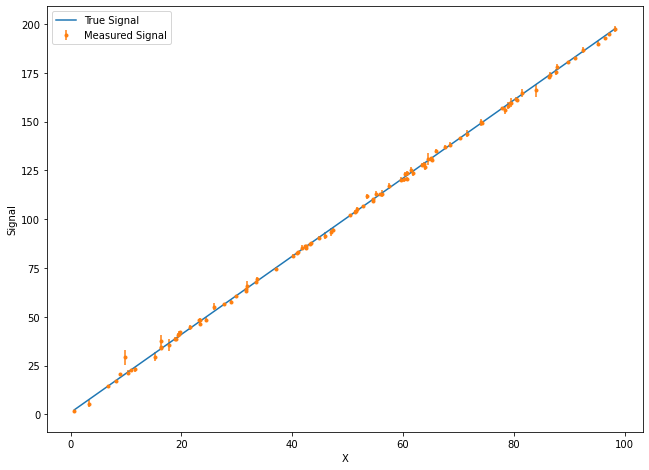

In [2]:
# Generate the data
N = 100

# Time and errors
T = np.sort(np.random.rand(N))*N
errors_sigma = np.random.chisquare(4,size=N)/4

#True Signal
true_coeffs = [1, 2, 0]
true_signal =  true_coeffs[0]  *np.ones(N)  + true_coeffs[1] *T +  true_coeffs[2] *T**2

# Observations
noise = errors_sigma*np.random.randn(N)
y_sig = true_signal + noise

# Plotting
plt.figure(figsize=(16/1.5, 9/1.15))
plt.plot(T, true_signal, label='True Signal')
plt.errorbar(T, y_sig, yerr=errors_sigma, fmt='.', label='Measured Signal')
plt.xlabel('X')
plt.ylabel('Signal')
plt.legend()

For the constant, linear and quadratic model, compute the Bayesian information criterion.
1) What is the model favoured by the bic ? 

2) Compute the empirical distribution of the BICs for true_coeffs = [1, 2, 0]

3) How does this distribution evolves with N the number of data points ? 

In [3]:
# Defining some functions

def constant(x, a0):
    return np.ones(len(x))*a0

def linear(x, a0, a1):
    yy = a0 + a1*x
    return yy

def quadratic(x, a0, a1, a2):
    yy = a0 + x*a1 + x*x*a2
    return yy

def chi2(model, params, x, y, sig):
    if model=='constant':
        yy = constant(x, params[0])
    elif model=='linear':
        yy = linear(x, params[0][0], params[1][0])
    elif model=='quadratic':
        yy = quadratic(x, params[0][0], params[1][0], params[2][0])
    chi = ((y-yy)/sig)**2
    chi1 = np.sum(chi)
    return chi1

def cal_bic(model, params, x, y, sig):
    ml = chi2(model, params, x, y, sig)
    kk = len(params)
    nn = len(y)
    bic1 = np.log(ml) + kk*np.log(nn)
    return bic1

def const_solve(x, y, sig):
    aa = np.sum(y/(sig**2))
    bb = np.sum((1/sig)**2)
    a0 = aa/bb
    return np.array([a0])

def lin_solve(x, y, sig):
    AA = np.array([[np.sum(1/(sig**2)), np.sum(x/(sig**2))],[np.sum(x/(sig**2)), np.sum((x/sig)**2)]])
    BB = np.array([[np.sum(y/(sig**2))],[np.sum((x*y)/(sig**2))]])
    AA1 = np.linalg.inv(AA)
    theta = AA1.dot(BB)
    return theta

def qua_solve(x, y, sig):
    AA = np.array([[np.sum(1/sig**2), np.sum(x/sig**2), np.sum(x**2/sig**2)],
                   [np.sum(x/sig**2), np.sum(x**2/sig**2), np.sum(x**3/sig**2)],
                   [np.sum(x**2/sig**2), np.sum(x**3/sig**2), np.sum(x**4/sig**2)]])
    AA1 = np.linalg.inv(AA)
    BB = np.array([[np.sum(y/sig**2)],
                   [np.sum(y*x/sig**2)],
                   [np.sum(y*x*x/sig**2)]])
    theta = AA1.dot(BB)
    return theta

Model parameters:
Constant Model:- 
a0 =  89.25
BIC =  19.0831682820023
----------------------
Linear Model:- 
a0 = 1.08 and a1 = 2.0
BIC =  13.791846418831366
----------------------
Quadratic Model:- 
a0 = 0.85, a1 = 2.01 and a2 = -0.0
BIC =  18.36257599164079


<Figure size 768x432 with 0 Axes>

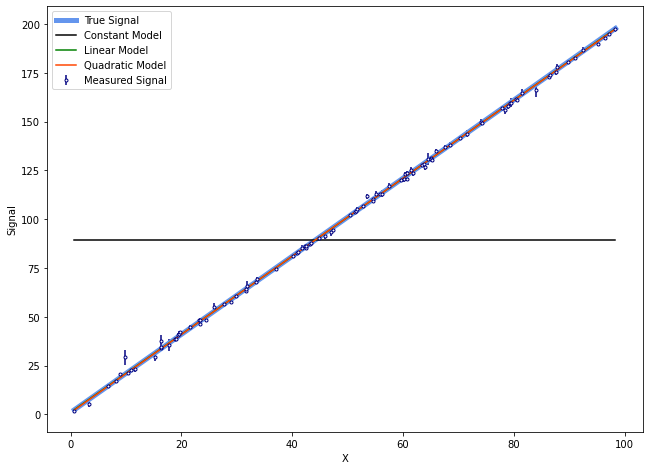

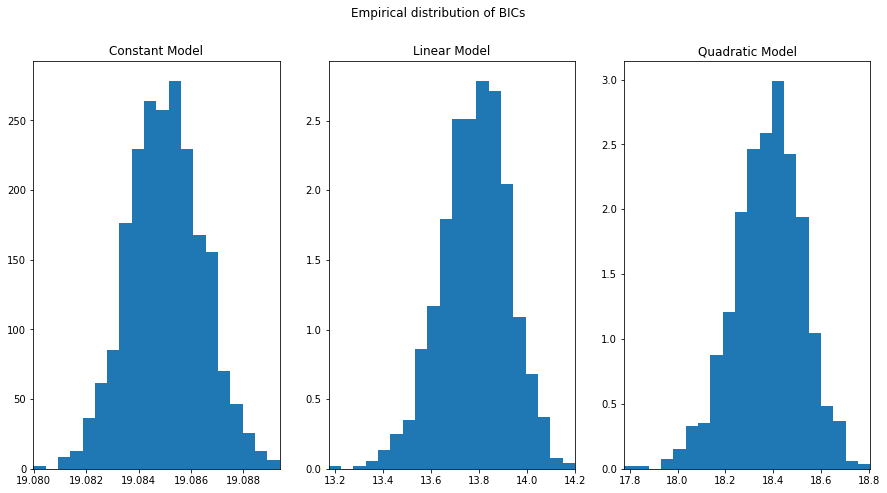

In [4]:
Nsim = 1000
bic_cons = np.zeros(Nsim)
bic_lin = np.zeros(Nsim)
bic_qua = np.zeros(Nsim)

for i in range(Nsim):
    noise = errors_sigma*np.random.randn(N)
    y_sig1 = true_signal + noise
    # Constant model
    the_con = const_solve(T, y_sig1, errors_sigma)
    bic_con1 = cal_bic('constant', the_con, T, y_sig1, errors_sigma)
    bic_cons[i] = bic_con1
    # Linear model
    the_lin = lin_solve(T, y_sig1, errors_sigma)
    bic_lin1 = cal_bic('linear', the_lin, T, y_sig1, errors_sigma)
    bic_lin[i] = bic_lin1
    # Quadratic model
    the_qua = qua_solve(T, y_sig1, errors_sigma)
    bic_qua1 = cal_bic('quadratic', the_qua, T, y_sig1, errors_sigma)
    bic_qua[i] = bic_qua1
    

# Best fitted model
theta_cons = const_solve(T, y_sig, errors_sigma)
yy_const = constant(T, theta_cons[0])
theta_lin = lin_solve(T, y_sig, errors_sigma)
yy_lin = linear(T, theta_lin[0][0], theta_lin[1][0])
theta_qua = qua_solve(T, y_sig, errors_sigma)
yy_qua = quadratic(T, theta_qua[0][0], theta_qua[1][0], theta_qua[2][0])

print('Model parameters:')
print('Constant Model:- ')
print('a0 = ', np.around(theta_cons[0],2))
print('BIC = ', cal_bic('constant', theta_cons, T, y_sig, errors_sigma))
print('----------------------')
print('Linear Model:- ')
print('a0 = ' + str(np.around(theta_lin[0][0],2)) + ' and a1 = ' + str(np.around(theta_lin[1][0],2)))
print('BIC = ', cal_bic('linear', theta_lin, T, y_sig, errors_sigma))
print('----------------------')
print('Quadratic Model:- ')
print('a0 = ' + str(np.around(theta_qua[0][0],2)) + ', a1 = ' + str(np.around(theta_qua[1][0],2)) 
      + ' and a2 = ' + str(np.around(theta_qua[2][0], 2)))
print('BIC = ', cal_bic('quadratic', theta_qua, T, y_sig, errors_sigma))

plt.figure(figsize=(16/1.5, 9/1.5))
plt.figure(figsize=(16/1.5, 9/1.15))
plt.plot(T, true_signal, lw=5, color='cornflowerblue', label='True Signal')
plt.errorbar(T, y_sig, yerr=errors_sigma, color='navy', fmt='.', mfc='white', label='Measured Signal')
plt.plot(T, yy_const, color='black', label='Constant Model')
plt.plot(T, yy_lin, color='green', label='Linear Model')
plt.plot(T, yy_qua, color='orangered', label='Quadratic Model')
plt.xlabel('X')
plt.ylabel('Signal')
plt.legend()
plt.show()
    
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3,
                                    figsize=(15, 7.5))

ax0.set_title('Constant Model')
ax0.hist(bic_cons, bins=20, density=True)
ax0.set_xlim([np.min(bic_cons), np.max(bic_cons)])

ax1.set_title('Linear Model')
ax1.hist(bic_lin, bins=20, density=True)
ax1.set_xlim([np.min(bic_lin), np.max(bic_lin)])

ax2.set_title('Quadratic Model')
ax2.hist(bic_qua, bins=20, density=True)
ax2.set_xlim([np.min(bic_qua), np.max(bic_qua)])

fig.suptitle('Empirical distribution of BICs')
plt.show()